Instructions for updating:
non-resource variables are not supported in the long term


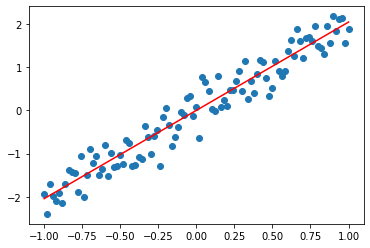

In [2]:
#import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
 
learning_rate = 0.01
training_epochs = 100
 
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33
 
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
 
def model(X, w):
    return tf.multiply(X, w)  
    
w = tf.Variable(0.0, name="weights")
 
y_model = model(X, w)
cost = tf.square(Y-y_model)
 
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
    
for epoch in range(training_epochs):
  for (x, y) in zip(x_train, y_train):
    sess.run(train_op, feed_dict={X: x, Y: y})
 
w_val = sess.run(w)
 
sess.close()
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

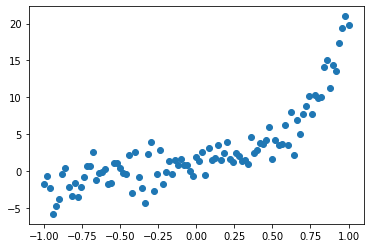

[0.87645286 2.5690649  3.3313923  4.5524216  4.133148   4.904997  ]


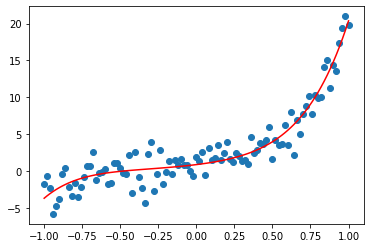

In [5]:
#import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
 
learning_rate = 0.01
training_epochs = 40
 
trX = np.linspace(-1, 1, 101)
 
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)
 
trY += np.random.randn(*trX.shape) * 1.5
 
plt.scatter(trX, trY)
plt.show()
 
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
 
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)
 
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)
  
cost = (tf.pow(Y-y_model, 2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
 
for epoch in range(training_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})
 
w_val = sess.run(w)
print(w_val)
 
sess.close()
 
plt.scatter(trX, trY)
trY2 = 0
for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i)
 
plt.plot(trX, trY2, 'r')
plt.show()